In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
neg_fname = 'ago_binding_peaks_mouse_brain_mm10_extlr30_conext100_th13_negatives.train.fa'
pos_fname = 'ago_binding_peaks_mouse_brain_mm10_extlr30_conext100_th13_positives.train.fa'
complexity=3
n_clusters=20
min_subarray_size = 5
max_subarray_size = 10

In [9]:
from eden.converter.fasta import fasta_to_sequence
pos_seqs = fasta_to_sequence(pos_fname)
neg_seqs = fasta_to_sequence(neg_fname)

In [10]:
%%time
from eden.eden_motif import SequenceMotifDecomposer
m=SequenceMotifDecomposer(complexity=complexity,
                          n_clusters=n_clusters,
                          min_subarray_size=min_subarray_size,
                          max_subarray_size=max_subarray_size)
m.fit(pos_seqs, neg_seqs)

Setup 0.33 secs
0 (600, 1048577) (20.74 secs) (delta: 20.74)
1 (600, 1048577) (20.82 secs) (delta: 0.06)
2 (600, 1048577) (32.53 secs) (delta: 11.70)
3 (600, 1048577) (32.78 secs) (delta: 0.25)
4 (600, 1048577) (32.82 secs) (delta: 0.04)
5 (600, 1048577) (32.87 secs) (delta: 0.05)
CPU times: user 630 ms, sys: 295 ms, total: 925 ms
Wall time: 33.3 s


In [11]:
%%time
from eden.converter.fasta import fasta_to_sequence
pos_seqs = fasta_to_sequence(pos_fname)
clusters = m.predict(pos_seqs)

Setup 0.74 secs
0 (65.72 secs) (delta: 65.72)
1 (66.12 secs) (delta: 0.40)
2 (66.12 secs) (delta: 0.00)
3 (66.58 secs) (delta: 0.46)
4 (66.59 secs) (delta: 0.00)
5 (66.59 secs) (delta: 0.00)
Setup 0.10 secs
0 (300, 1048577) (0.73 secs) (delta: 0.73)
1 (300, 1048577) (0.83 secs) (delta: 0.10)
2 (300, 1048577) (0.93 secs) (delta: 0.09)
3 (300, 1048577) (1.02 secs) (delta: 0.09)
4 (300, 1048577) (1.10 secs) (delta: 0.08)
5 (300, 1048577) (1.17 secs) (delta: 0.07)
6 (300, 1048577) (1.25 secs) (delta: 0.08)
CPU times: user 7.82 s, sys: 1.45 s, total: 9.27 s
Wall time: 1min 16s


Cluster 0 (#81)


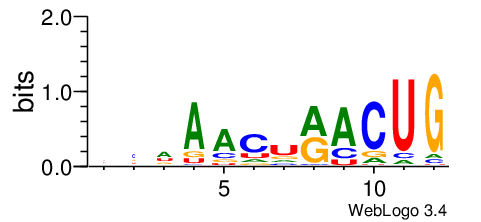

Cluster 1 (#93)


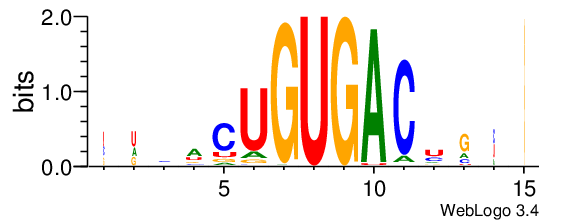

Cluster 2 (#187)


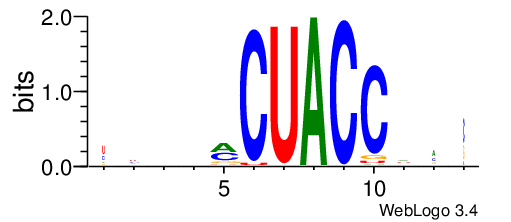

Cluster 3 (#81)


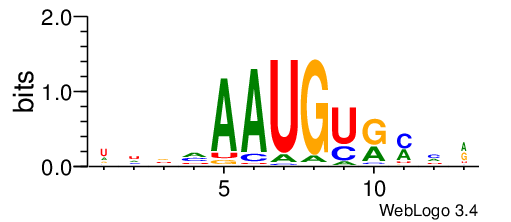

Cluster 4 (#163)


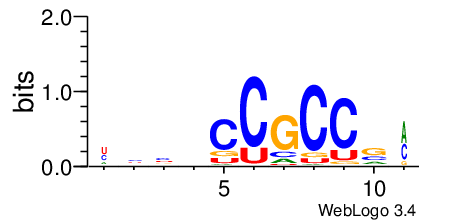

Cluster 5 (#101)


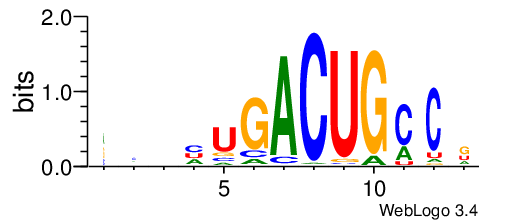

Cluster 6 (#142)


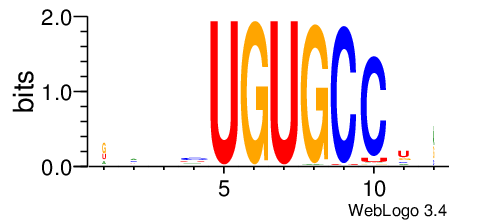

Cluster 7 (#85)


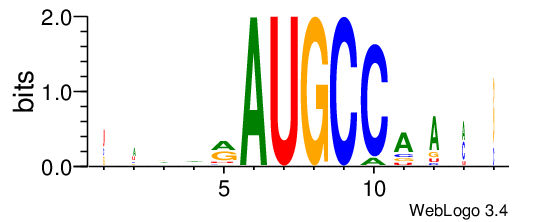

Cluster 8 (#156)


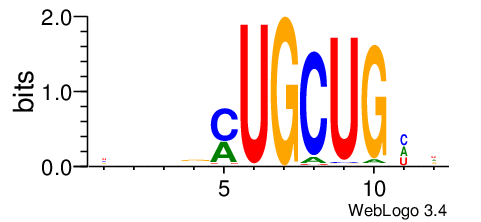

Cluster 9 (#122)


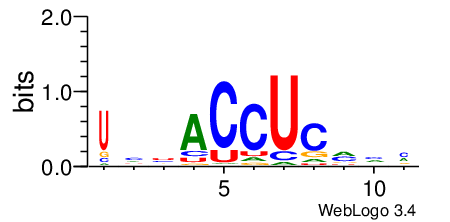

Cluster 10 (#82)


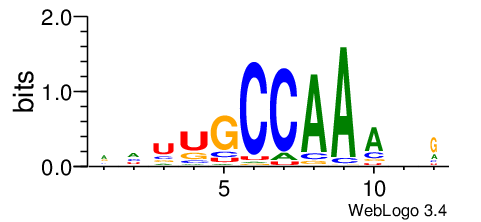

Cluster 11 (#63)


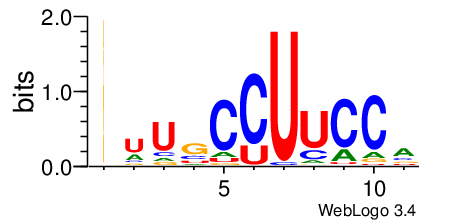

Cluster 12 (#35)


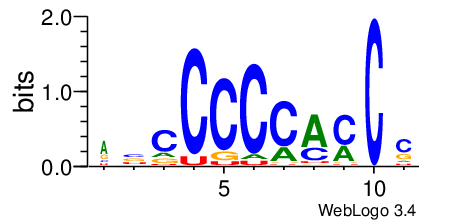

Cluster 13 (#75)


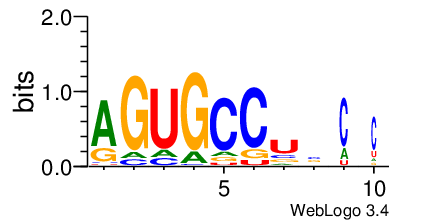

Cluster 14 (#114)


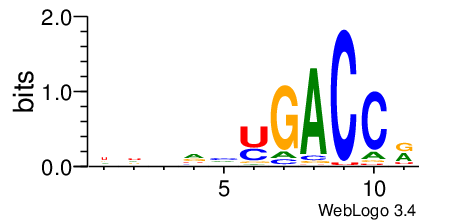

Cluster 15 (#218)


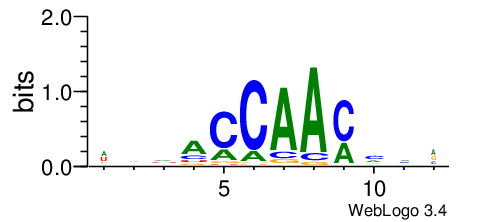

Cluster 16 (#95)


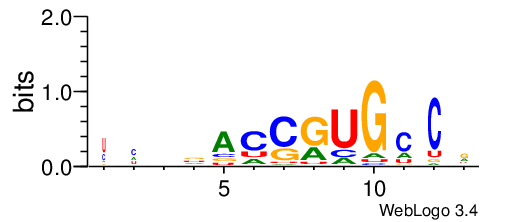

Cluster 17 (#99)


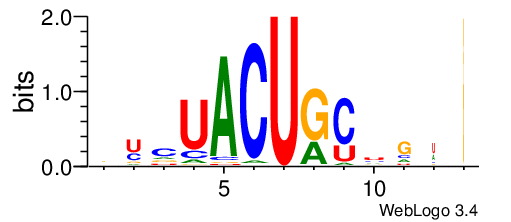

Cluster 18 (#62)


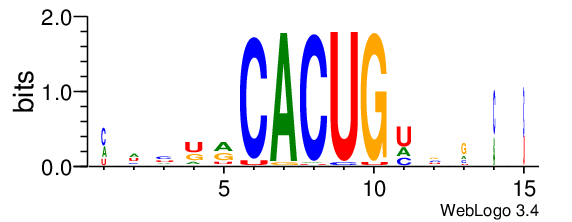

Cluster 19 (#46)


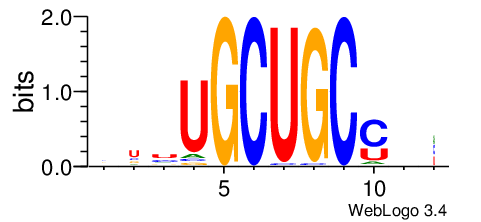

In [12]:
from eden_motif.utilities import MuscleAlignWrapper, Weblogo
from IPython.display import Image, display

#with alignment 
ma = MuscleAlignWrapper()
wb = Weblogo(output_format='png', sequence_type = 'rna', resolution=200, stacks_per_line=50, units='bits')

for cluster_id in clusters:
    seqs = [('ID', seq)  for seq in clusters[cluster_id]]
    aseqs = ma.transform(seqs=seqs)
    logo_image = wb.create_logo(seqs=aseqs)
    print 'Cluster %d (#%d)' % (cluster_id, len(seqs))
    display(Image(logo_image))

---